In [2]:
import wget
import tensorflow as tf
from zipfile import ZipFile 
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
import numpy as np

2023-11-11 23:54:39.520948: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [4]:
data= "https://github.com/SVizor42/ML_Zoomcamp/releases/download/bee-wasp-data/data.zip"
data= wget.download(data)
!unzip data

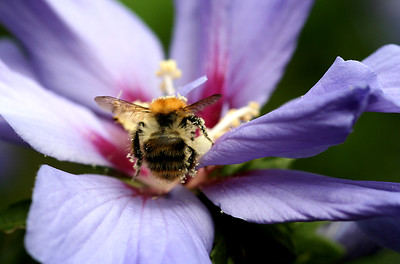

In [3]:
path = './data/train/bee'
name = '210210150_4d7e48e5f6_w.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [6]:
img = load_img(fullname)
x = np.array(img)
x.shape

(264, 400, 3)

### Data preparation

In [8]:
# Create a Sequential model
model = Sequential()

# Add a Convolutional layer with 32 filters, kernel size of (3, 3), and 'relu' activation
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu'))

# Add a MaxPooling layer with pooling size of (2, 2)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the result to feed into a Dense layer
model.add(Flatten())

# Add a Dense layer with 64 neurons and 'relu' activation
model.add(Dense(64, activation='relu'))

# Add the output layer with 1 neuron and appropriate activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Define the SGD optimizer with specified parameters
sgd = SGD(lr=0.002, momentum=0.8)

# Compile the model
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

# Print a summary of the model's architecture
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
____________________________________________

2023-11-12 17:37:38.611358: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-12 17:37:38.618993: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-12 17:37:38.619647: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-12 17:37:38.620882: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

### Question 1

The best function is binary cross entropy

### Question 2

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
____________________________________________

The number of parameters is 896

### Question 3

In [11]:
# Image data generation inizialization

train_gen = ImageDataGenerator(rescale=1./255)

test_gen = ImageDataGenerator(rescale=1./255)

In [16]:
# Training and test data generation

train_ds = train_gen.flow_from_directory(
    './data/train',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
)

test_ds = train_gen.flow_from_directory(
    './data/test',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
)

Found 3677 images belonging to 2 classes.
Found 918 images belonging to 2 classes.


In [17]:
#Training

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds
)

Epoch 1/10


2023-11-12 18:31:23.798882: W tensorflow/core/common_runtime/forward_type_inference.cc:231] Type inference failed. This indicates an invalid graph that escaped type checking. Error message: INVALID_ARGUMENT: expected compatible input types, but input 1:
type_id: TFT_OPTIONAL
args {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_TENSOR
    args {
      type_id: TFT_BOOL
    }
  }
}
 is neither a subtype nor a supertype of the combined inputs preceding it:
type_id: TFT_OPTIONAL
args {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_TENSOR
    args {
      type_id: TFT_LEGACY_VARIANT
    }
  }
}

	while inferring type of node 'binary_crossentropy/cond/output/_11'


184/184 [==============================] - 9s 48ms/step - loss: 0.6768 - accuracy: 0.5610 - val_loss: 0.6630 - val_accuracy: 0.6045
Epoch 2/10
184/184 [==============================] - 8s 46ms/step - loss: 0.6340 - accuracy: 0.6416 - val_loss: 0.5963 - val_accuracy: 0.6764
Epoch 3/10
184/184 [==============================] - 9s 47ms/step - loss: 0.5862 - accuracy: 0.6931 - val_loss: 0.5429 - val_accuracy: 0.7243
Epoch 4/10
184/184 [==============================] - 9s 47ms/step - loss: 0.5336 - accuracy: 0.7330 - val_loss: 0.6866 - val_accuracy: 0.6493
Epoch 5/10
184/184 [==============================] - 9s 46ms/step - loss: 0.5037 - accuracy: 0.7643 - val_loss: 0.5382 - val_accuracy: 0.7396
Epoch 6/10
184/184 [==============================] - 9s 47ms/step - loss: 0.4742 - accuracy: 0.7811 - val_loss: 0.5215 - val_accuracy: 0.7482
Epoch 7/10
184/184 [==============================] - 9s 47ms/step - loss: 0.4592 - accuracy: 0.7949 - val_loss: 0.5049 - val_accuracy: 0.7645
Epoch 8/10

In [21]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

In [22]:
# Median train accuracy

median_train_acc = np.median(train_acc)
median_train_acc

0.7726822793483734

The median of train accuracy is aprox 0.8

### Question 4

In [23]:
# Sd training loss

sd_training_loss= np.std(train_loss)
sd_training_loss

0.09629173636946231

The standard deviation of training loss is aprox 0.091

### Question 5

In [24]:
# Training augmented model

train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_gen = ImageDataGenerator(rescale=1./255)

In [25]:
# Training and test data generation

train_ds = train_gen.flow_from_directory(
    './data/train',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
)

test_ds = train_gen.flow_from_directory(
    './data/test',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
)

Found 3677 images belonging to 2 classes.
Found 918 images belonging to 2 classes.


In [26]:
# Model fit

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds
)

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

Epoch 1/10
184/184 [==============================] - 28s 152ms/step - loss: 0.4943 - accuracy: 0.7701 - val_loss: 0.4794 - val_accuracy: 0.7787
Epoch 2/10
184/184 [==============================] - 28s 152ms/step - loss: 0.4858 - accuracy: 0.7726 - val_loss: 0.4719 - val_accuracy: 0.7998
Epoch 3/10
184/184 [==============================] - 28s 150ms/step - loss: 0.4819 - accuracy: 0.7795 - val_loss: 0.4761 - val_accuracy: 0.7688
Epoch 4/10
184/184 [==============================] - 28s 151ms/step - loss: 0.4755 - accuracy: 0.7780 - val_loss: 0.5222 - val_accuracy: 0.7460
Epoch 5/10
184/184 [==============================] - 28s 152ms/step - loss: 0.4693 - accuracy: 0.7875 - val_loss: 0.5101 - val_accuracy: 0.7601
Epoch 6/10
184/184 [==============================] - 28s 153ms/step - loss: 0.4715 - accuracy: 0.7806 - val_loss: 0.4842 - val_accuracy: 0.7702
Epoch 7/10
184/184 [==============================] - 28s 151ms/step - loss: 0.4608 - accuracy: 0.7883 - val_loss: 0.4966 - val_ac

In [28]:
# mean test loss for all the epochs

mean_test_loss = np.mean(val_loss)
mean_test_loss

0.48453072309494016

Mean test loss is aprox 0.48

### Question 6

In [29]:
# mean test accuracy for last 5 epochs

last_five_val_acc = val_acc[-5:]

mean_test_accuracy_last5 = np.mean(last_five_val_acc)
mean_test_accuracy_last5

0.7846859455108642

Mean test accuracy for last 5 epochs is aprox 0.78